In [23]:
from collections import defaultdict
from functools import partial
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from rich.pretty import pprint as pp

ppe = partial(pp, expand_all=True)


In [24]:
csvs = list(Path("../../results").resolve().glob("**/*.csv"))

In [25]:
dfs = defaultdict(dict)
for csv_path in csvs:
    # key = ".".join(csv_path.parts[-2:]).replace(" ", "_")
    setup, run_name = csv_path.parts[-2:]
    dfs[setup.replace(" ", "_")][run_name] = pd.read_csv(csv_path)
    # dfs[key] = pd.read_csv(csv_path)

In [26]:
ppe([*dfs["4_legs_0_SA_500k_steps"].keys()])

[
│   'Ant-v4__999__20240607-075604_charts_episodic_return_env-0.csv',
│   'Ant-v4__999__20240607-075604_charts_episodic_return_env-1.csv',
│   'Ant-v4__999__20240607-075604_charts_episodic_return_env-2.csv',
│   'Ant-v4__999__20240607-075604_charts_episodic_return_env-3.csv'
]

In [27]:
dfs["4_legs_0_SA_500k_steps"]["Ant-v4__999__20240607-075604_charts_episodic_return_env-1.csv"]

,Wall time,Step,Value
0,1.717736e+09,13,-11.716684
1,1.717736e+09,31,-13.627132
2,1.717736e+09,1031,-383.094360
3,1.717736e+09,1062,-4.662867
4,1.717736e+09,1151,-59.544853
...,...,...,...
636,1.717746e+09,497167,4437.287109
637,1.717746e+09,498167,5594.033691
638,1.717746e+09,498385,960.343689
639,1.717746e+09,498847,2430.994141


In [28]:
SA0 = dfs["4_legs_0_SA_500k_steps"]["Ant-v4__999__20240607-075604_charts_episodic_return_env-0.csv"].merge(dfs["4_legs_0_SA_500k_steps"]["Ant-v4__999__20240607-075604_charts_episodic_return_env-1.csv"], how='outer')
SA0 = SA0.merge(dfs["4_legs_0_SA_500k_steps"]["Ant-v4__999__20240607-075604_charts_episodic_return_env-2.csv"], how='outer')
SA0 = SA0.merge(dfs["4_legs_0_SA_500k_steps"]["Ant-v4__999__20240607-075604_charts_episodic_return_env-3.csv"], how='outer')

In [29]:
SA0

,Wall time,Step,Value
0,1.717736e+09,13,-11.716684
1,1.717736e+09,31,-13.627132
2,1.717736e+09,61,-13.186014
3,1.717736e+09,94,-15.728502
4,1.717736e+09,116,-18.909285
...,...,...,...
2604,1.717746e+09,498991,3985.627930
2605,1.717746e+09,499094,3116.438232
2606,1.717747e+09,499730,5642.908691
2607,1.717747e+09,499847,5710.327637


In [30]:
ppe([*dfs["4_legs_1_SA_500k_steps"].keys()])

[
│   'Ant-v4__999__20240607-143409_charts_episodic_return_env-0.csv',
│   'Ant-v4__999__20240607-143409_charts_episodic_return_env-1.csv',
│   'Ant-v4__999__20240607-143409_charts_episodic_return_env-2.csv',
│   'Ant-v4__999__20240607-143409_charts_episodic_return_env-3.csv'
]

In [31]:
SA1 = dfs["4_legs_1_SA_500k_steps"]["Ant-v4__999__20240607-143409_charts_episodic_return_env-0.csv"].merge(dfs["4_legs_1_SA_500k_steps"]["Ant-v4__999__20240607-143409_charts_episodic_return_env-1.csv"], how='outer')
SA1 = SA1.merge(dfs["4_legs_1_SA_500k_steps"]["Ant-v4__999__20240607-143409_charts_episodic_return_env-2.csv"], how='outer')
SA1 = SA1.merge(dfs["4_legs_1_SA_500k_steps"]["Ant-v4__999__20240607-143409_charts_episodic_return_env-3.csv"], how='outer')

In [32]:
SA1

,Wall time,Step,Value
0,1.717760e+09,13,-11.716684
1,1.717760e+09,31,-13.627132
2,1.717760e+09,61,-13.186014
3,1.717760e+09,94,-15.728502
4,1.717760e+09,116,-18.909285
...,...,...,...
2568,1.717771e+09,498834,5440.044922
2569,1.717771e+09,499643,5587.238770
2570,1.717771e+09,499708,5515.217773
2571,1.717771e+09,499779,5562.559082


In [33]:
ppe([*dfs["4_legs_2_SA_500k_steps"].keys()])

[
│   'Ant-v4__999__20240607-192921_charts_episodic_return_env-0.csv',
│   'Ant-v4__999__20240607-192921_charts_episodic_return_env-1.csv',
│   'Ant-v4__999__20240607-192921_charts_episodic_return_env-2.csv',
│   'Ant-v4__999__20240607-192921_charts_episodic_return_env-3.csv'
]

In [34]:
SA2 = dfs["4_legs_2_SA_500k_steps"]["Ant-v4__999__20240607-192921_charts_episodic_return_env-0.csv"].merge(dfs["4_legs_2_SA_500k_steps"]["Ant-v4__999__20240607-192921_charts_episodic_return_env-1.csv"], how='outer')
SA2 = SA2.merge(dfs["4_legs_2_SA_500k_steps"]["Ant-v4__999__20240607-192921_charts_episodic_return_env-2.csv"], how='outer')
SA2 = SA2.merge(dfs["4_legs_2_SA_500k_steps"]["Ant-v4__999__20240607-192921_charts_episodic_return_env-3.csv"], how='outer')

In [35]:
SA2

,Wall time,Step,Value
0,1.717778e+09,13,-11.716684
1,1.717778e+09,31,-13.627132
2,1.717778e+09,61,-13.186014
3,1.717778e+09,94,-15.728502
4,1.717778e+09,116,-18.909285
...,...,...,...
2622,1.717789e+09,498778,5382.514160
2623,1.717789e+09,499244,5623.976562
2624,1.717789e+09,499402,5317.702148
2625,1.717789e+09,499761,5459.488770


In [36]:
ppe([*dfs["4_legs_3_SA_500k_steps"].keys()])

[
│   'Ant-v4__999__20240606-232800_charts_episodic_return_env-0.csv',
│   'Ant-v4__999__20240606-232800_charts_episodic_return_env-1.csv',
│   'Ant-v4__999__20240606-232800_charts_episodic_return_env-2.csv',
│   'Ant-v4__999__20240606-232800_charts_episodic_return_env-3.csv'
]

In [37]:
SA3 = dfs["4_legs_3_SA_500k_steps"]["Ant-v4__999__20240606-232800_charts_episodic_return_env-0.csv"].merge(dfs["4_legs_3_SA_500k_steps"]["Ant-v4__999__20240606-232800_charts_episodic_return_env-1.csv"], how='outer')
SA3 = SA3.merge(dfs["4_legs_3_SA_500k_steps"]["Ant-v4__999__20240606-232800_charts_episodic_return_env-2.csv"], how='outer')
SA3 = SA3.merge(dfs["4_legs_3_SA_500k_steps"]["Ant-v4__999__20240606-232800_charts_episodic_return_env-3.csv"], how='outer')

In [38]:
SA3

,Wall time,Step,Value
0,1.717706e+09,13,-11.716684
1,1.717706e+09,31,-13.627132
2,1.717706e+09,61,-13.186014
3,1.717706e+09,94,-15.728502
4,1.717706e+09,116,-18.909285
...,...,...,...
2482,1.717718e+09,499225,891.150513
2483,1.717718e+09,499347,5170.809570
2484,1.717718e+09,499383,5571.200684
2485,1.717718e+09,499573,861.751892


In [39]:
ppe([*dfs["4_legs_4_SA_500k_steps"].keys()])

[
│   'Ant-v4__999__20240612-154152_charts_episodic_return_env-0.csv',
│   'Ant-v4__999__20240612-154152_charts_episodic_return_env-1.csv',
│   'Ant-v4__999__20240612-154152_charts_episodic_return_env-2.csv',
│   'Ant-v4__999__20240612-154152_charts_episodic_return_env-3.csv'
]

In [40]:
SA4 = dfs["4_legs_4_SA_500k_steps"]["Ant-v4__999__20240612-154152_charts_episodic_return_env-0.csv"].merge(dfs["4_legs_4_SA_500k_steps"]["Ant-v4__999__20240612-154152_charts_episodic_return_env-1.csv"], how='outer')
SA4 = SA4.merge(dfs["4_legs_4_SA_500k_steps"]["Ant-v4__999__20240612-154152_charts_episodic_return_env-2.csv"], how='outer')
SA4 = SA4.merge(dfs["4_legs_4_SA_500k_steps"]["Ant-v4__999__20240612-154152_charts_episodic_return_env-3.csv"], how='outer')

In [41]:
SA4

,Wall time,Step,Value
0,1.718196e+09,13,-11.716684
1,1.718196e+09,31,-13.627132
2,1.718196e+09,61,-13.186014
3,1.718196e+09,94,-15.728502
4,1.718196e+09,116,-18.909285
...,...,...,...
2575,1.718210e+09,499066,5355.530273
2576,1.718210e+09,499193,5236.681152
2577,1.718210e+09,499346,5164.538086
2578,1.718210e+09,499597,2166.253418


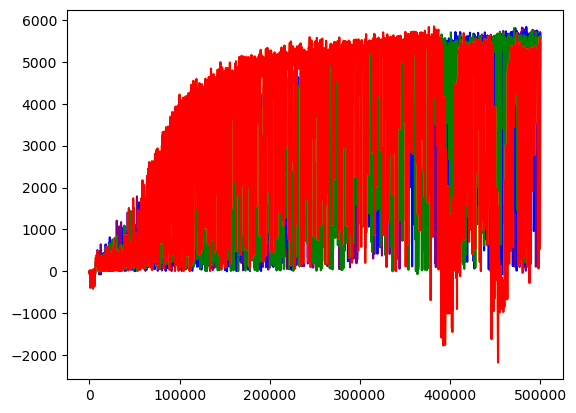

In [42]:
plt.plot(SA0['Step'], SA0['Value'], color='purple')
plt.plot(SA1['Step'], SA1['Value'], color='blue')
plt.plot(SA2['Step'], SA2['Value'], color='green')
plt.plot(SA3['Step'], SA3['Value'], color='orange')
plt.plot(SA3['Step'], SA3['Value'], color='r')
plt.show()

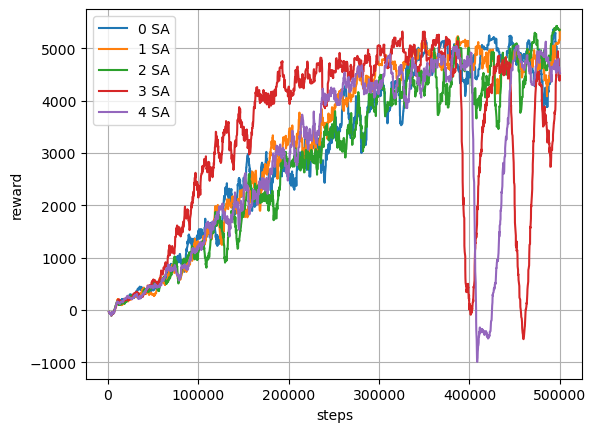

In [44]:
fig, axs = plt.subplots()
axs: Axes
for idx, report in enumerate((SA0, SA1, SA2, SA3, SA4)):
    axs.plot(report["Step"], report["Value"].rolling(window=30).mean(), label=f"{idx} SA")
axs.legend()
axs.set_xlabel("steps")
axs.set_ylabel("reward")
axs.grid()
plt.show()